In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance, anova_lm

# Case Study 
## The annual Percentage Rate of Interest Charged on New-Car Loans at Nine of the 					Largest Banks in Six American Cities is provided and It is believed that the mean interest rate is same across the six american cities.  Conduct the hypothesis test and provide your inference


Use level of significance $\alpha$ = 0.05

In [2]:
df=pd.read_csv('1. Practice exercise car_insurance_rate.csv',sep='\t')

In [3]:
df.head()

,Atlanta,Chicago,Houston,Memphis,New York,Philadelphia
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Atlanta       9 non-null      float64
 1   Chicago       9 non-null      float64
 2   Houston       9 non-null      float64
 3   Memphis       9 non-null      float64
 4   New York      9 non-null      float64
 5   Philadelphia  9 non-null      float64
dtypes: float64(6)
memory usage: 560.0 bytes


In [5]:
df.isnull().sum()

Atlanta         0
Chicago         0
Houston         0
Memphis         0
New York        0
Philadelphia    0
dtype: int64

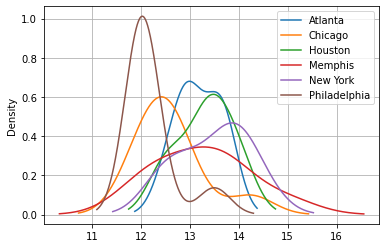

In [6]:
df.plot(kind='kde')
plt.legend()
plt.grid()

# 1. Postulate the Null and Alternate Hypothesis

H0: The mean interest rate in all six american cities is same

H1: The mean interest rate is different in atleast one of the six american cities

# 2. Perform the analysis of variances test on the dataset

In [7]:
df_melt=df.melt(var_name='city')
df_melt.head(3)

,city,value
0,Atlanta,13.75
1,Atlanta,13.75
2,Atlanta,13.50


In [8]:
df_melt['city'].value_counts()

Atlanta         9
Chicago         9
Houston         9
Memphis         9
New York        9
Philadelphia    9
Name: city, dtype: int64

In [9]:
formula='value ~ city'
model=ols(formula,df_melt).fit()
aov_table=anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
city,5.0,10.945667,2.189133,4.829385,0.001175
Residual,48.0,21.758133,0.453294,NaN,NaN


# 3. What are sum of squared variance within and sum of squared variance between?

In [13]:
aov_table['sum_sq'][0]

10.94566666666663

# 4. Calculate sum of squared total for above

SST=SSB+SSW

In [14]:
aov_table['sum_sq']

city        10.945667
Residual    21.758133
Name: sum_sq, dtype: float64

In [15]:
SSW=aov_table['sum_sq'][1]
SSB=aov_table['sum_sq'][0]
SST= SSW+SSB
print('Sum of Squared Total',SST)

Sum of Squared Total 32.703799999999966


# 5. What is the significance of F dist/statistic?

F-Distribution or F-Statistic is the ratio of MSB to MSW.

It gives the degree of how relatively greater the difference is 'between group means' (MSB) compared to 'within group variance' (MSW)

If the ratio is greater than expected will mean that not all the group means are the same and at least one mean is substantially different.

# 6. Interpret the results and present the conclusion

pvalue=0.001174551414504048 is smaller than the level of significance α 0.05

The null hypothesis is rejected based on the above observation and it is concluded that the mean interest rate is not same across all six american cities